# A First Neural Network Example

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Generating synthetic data

In [2]:
nsamp = 400   
nx = 2        

X = np.random.uniform(0,1,(nsamp,nx))

rsq = (X[:,0]-0.5)**2 + (X[:,1]-0.5)**2
z = 10*(np.exp(-8*rsq)-0.5)
py = 1/(1+np.exp(-z))
u = np.random.uniform(0,1,nsamp)
y = (u < py).astype(int)

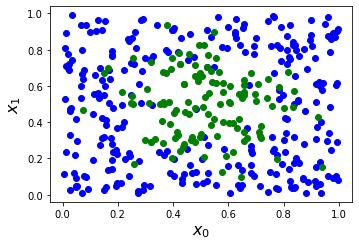

In [3]:
I0 = np.where(y==0)[0]
I1 = np.where(y==1)[0]
plt.plot(X[I0,0], X[I0,1], 'bo')
plt.plot(X[I1,0], X[I1,1], 'go')
plt.xlabel('$x_0$', fontsize=16)
plt.ylabel('$x_1$', fontsize=16)
plt.subplots_adjust(bottom=0.2, left=0.2)

Creating a Neural Network

In [4]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation

Clearing session clears any model layers created before

In [5]:
import tensorflow.keras.backend as K
K.clear_session()

In [6]:
nin = nx  
nh = 4    
nout = 1  
model = Sequential()
model.add(Dense(units=nh, input_shape=(nx,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='sigmoid', name='output'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Training the network



In [8]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(X, y, epochs=10, batch_size=100)

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7418 - accuracy: 0.3325
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.5125
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5725
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.7000
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.7025
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.7025
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7025
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7025
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7025
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7025


In [10]:
nit = 20   
nepoch_per_it = 50  


loss = np.zeros(nit)
acc = np.zeros(nit)
epoch_it = np.zeros(nit)


for it in range(nit):
    
    
    init_epoch = it*nepoch_per_it
    model.fit(X, y, epochs=nepoch_per_it, batch_size=100, verbose=0)
    
    
    lossi, acci = model.evaluate(X,y, verbose=0)
    epochi = (it+1)*nepoch_per_it
    epoch_it[it] = epochi
    loss[it] = lossi
    acc[it] = acci
    print("epoch=%4d loss=%12.4e acc=%7.5f" % (epochi,lossi,acci))

epoch=  50 loss=  6.0840e-01 acc=0.70250
epoch= 100 loss=  6.0774e-01 acc=0.70250
epoch= 150 loss=  6.0598e-01 acc=0.70250
epoch= 200 loss=  5.9718e-01 acc=0.70250
epoch= 250 loss=  5.7365e-01 acc=0.70250
epoch= 300 loss=  5.4173e-01 acc=0.70250
epoch= 350 loss=  4.9654e-01 acc=0.70750
epoch= 400 loss=  4.5185e-01 acc=0.81250
epoch= 450 loss=  4.1013e-01 acc=0.83250
epoch= 500 loss=  3.6833e-01 acc=0.85500
epoch= 550 loss=  3.3761e-01 acc=0.88250
epoch= 600 loss=  3.1992e-01 acc=0.88000
epoch= 650 loss=  3.1031e-01 acc=0.88000
epoch= 700 loss=  3.0474e-01 acc=0.88250
epoch= 750 loss=  3.0142e-01 acc=0.88500
epoch= 800 loss=  2.9935e-01 acc=0.88250
epoch= 850 loss=  2.9807e-01 acc=0.87250
epoch= 900 loss=  2.9707e-01 acc=0.88250
epoch= 950 loss=  2.9646e-01 acc=0.88250
epoch=1000 loss=  2.9601e-01 acc=0.88000


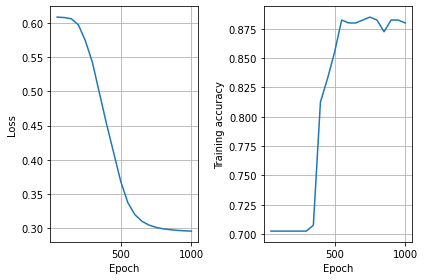

In [11]:
epoch_it = np.arange(1,nit+1)*nepoch_per_it
plt.subplot(1,2,1)
plt.plot(epoch_it, loss)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(epoch_it, acc)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.tight_layout()
plt.show()

In [12]:
import tensorflow.keras.callbacks

class PeriodicPrintLoss(tensorflow.keras.callbacks.Callback):
    def __init__(self, prt_period=100):
        self.prt_period = prt_period
        
    def on_train_begin(self, logs={}):
        self.losses = []
        self.step = 0

    def on_batch_end(self, batch, logs={}):
        # Record the loss
        loss = logs.get('loss')
        self.losses.append(loss)
        
        # Print the loss periodically
        if (self.step % self.prt_period == 0):
            print('step=%6d loss=%12.4e' % (self.step, loss))
        self.step += 1
        
# Compute print period in steps 
batch_size = 100
prt_period = nepoch_per_it*int(nsamp/batch_size)

# Create the callback 
loss_cb = PeriodicPrintLoss(prt_period=prt_period)

# Run the fit with the callback
model.fit(X, y, epochs=200, batch_size=batch_size, verbose=0, callbacks=[loss_cb])

step=     0 loss=  2.7827e-01
step=   200 loss=  3.2832e-01
step=   400 loss=  2.7220e-01
step=   600 loss=  2.5949e-01


Visualizing Decision Regions

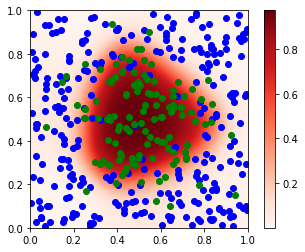

In [13]:
xmin = [0,0]
xmax = [1,1]

# Use meshgrid to create the 2D input
nplot = 100
x0plot = np.linspace(xmin[0],xmax[1],nplot)
x1plot = np.linspace(xmin[0],xmax[1],nplot)
x0mat, x1mat = np.meshgrid(x0plot,x1plot)
Xplot = np.column_stack([x0mat.ravel(), x1mat.ravel()])

# Compute the output 
yplot = model.predict(Xplot)
yplot_mat = yplot[:,0].reshape((nplot, nplot))

# Plot the recovered region
plt.imshow(np.flipud(yplot_mat), extent=[xmin[0],xmax[0],xmin[0],xmax[1]], cmap=plt.cm.Reds)
plt.colorbar()

# Overlay the samples
I0 = np.where(y==0)[0]
I1 = np.where(y==1)[0]
plt.plot(X[I0,0], X[I0,1], 'bo')
plt.plot(X[I1,0], X[I1,1], 'go')

Printing output of hidden layers

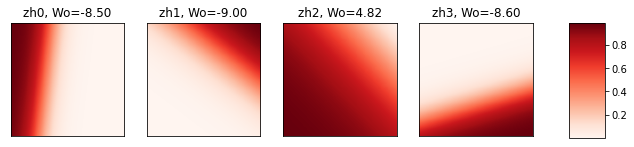

In [14]:
layer_hid = model.get_layer('hidden')
model1 = Model(inputs=model.input,
               outputs=layer_hid.output)
zhid_plot = model1.predict(Xplot)
zhid_plot = zhid_plot.reshape((nplot,nplot,nh))

# Get the weights in the output layer
layer_out = model.get_layer('output')
Wo, bo = layer_out.get_weights()

fig = plt.figure(figsize=(10, 4))

for i in range(nh):

    plt.subplot(1,nh,i+1)
    zhid_ploti = np.flipud(zhid_plot[:,:,i])
    im = plt.imshow(zhid_ploti, extent=[xmin[0],xmax[0],xmin[0],xmax[1]], cmap=plt.cm.Reds)
    plt.xticks([])
    plt.yticks([])
    plt.title('zh{0:d}, Wo={1:4.2f}'.format(i,Wo[i,0]))
  
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.30, 0.05, 0.4])
fig.colorbar(im, cax=cbar_ax)

Printing the model parameters

In [15]:
g=model.get_weights()
print('Model weights')
print(g)

Model weights
[array([[-14.14254  ,   5.2243586,  -3.245126 ,   3.3746223],
       [  1.6984248,   6.808245 ,  -3.0316648, -11.50133  ]],
      dtype=float32), array([ 3.2180543, -8.420246 ,  4.945575 ,  1.3114884], dtype=float32), array([[-8.497911],
       [-8.998339],
       [ 4.815105],
       [-8.602897]], dtype=float32), array([1.0803665], dtype=float32)]


In [16]:
layer_hid = model.get_layer('hidden')
Wh, bh = layer_hid.get_weights()
print('Wh=')
print(Wh)
print('bh=')
print(bh)

layer_out = model.get_layer('output')
Wo, bo = layer_out.get_weights()
print('Wo=')
print(Wo)
print('bo=')
print(bo)

Wh=
[[-14.14254     5.2243586  -3.245126    3.3746223]
 [  1.6984248   6.808245   -3.0316648 -11.50133  ]]
bh=
[ 3.2180543 -8.420246   4.945575   1.3114884]
Wo=
[[-8.497911]
 [-8.998339]
 [ 4.815105]
 [-8.602897]]
bo=
[1.0803665]


Computing gradients via Backpropagation

In [17]:
def forward(param, X, y):
    """
    Computes the BCE loss for a neural network
    with one hidden layer and sigmoid activations
    """
    
    # Unpack the parameters
    Wh, bh, Wo, bo = param
    
    # Hidden layer
    Zh = X.dot(Wh) + bh[None, :]
    Uh = 1/(1+np.exp(-Zh))
    
    # Output layer
    zo = Uh.dot(Wo) + bo[None, :]
    zo = zo.ravel()
    
    # Binary cross entropy
    loss = np.sum(np.log(1+np.exp(zo))-y*zo)
    
    return zo, loss

In [18]:
Wh = np.random.normal(0,1,(nx,nh))
bh = np.random.normal(0,1,(nh,))
Wo = np.random.normal(0,1,(nh,nout))
bo = np.random.normal(0,1,(nout))
param0 = [Wh,bh,Wo,bo]

# Compute output on the training data
zo, loss = forward(param0, X, y)